# EDA WITH PANDAS

In [6]:
import numpy as np
import pandas as pd

In [20]:
missing_values = ['n/a','na','--']
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',
    na_values = missing_values
)

In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [12]:
df.shape

(9, 7)

In [14]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [16]:
df['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [18]:
df['ST_NUM'].isna().sum()

2

In [23]:
df['OWN_OCCUPIED'].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [26]:
idx = 0
for value in df['OWN_OCCUPIED']:
    try:
        int(value)
        df.loc[idx, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
            pass
    idx += 1
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [30]:
date_range = pd.date_range(
    start='2020-10-05', 
    end='2020-10-08', 
    freq='H')
date_range

DatetimeIndex(['2020-10-05 00:00:00', '2020-10-05 01:00:00',
               '2020-10-05 02:00:00', '2020-10-05 03:00:00',
               '2020-10-05 04:00:00', '2020-10-05 05:00:00',
               '2020-10-05 06:00:00', '2020-10-05 07:00:00',
               '2020-10-05 08:00:00', '2020-10-05 09:00:00',
               '2020-10-05 10:00:00', '2020-10-05 11:00:00',
               '2020-10-05 12:00:00', '2020-10-05 13:00:00',
               '2020-10-05 14:00:00', '2020-10-05 15:00:00',
               '2020-10-05 16:00:00', '2020-10-05 17:00:00',
               '2020-10-05 18:00:00', '2020-10-05 19:00:00',
               '2020-10-05 20:00:00', '2020-10-05 21:00:00',
               '2020-10-05 22:00:00', '2020-10-05 23:00:00',
               '2020-10-06 00:00:00', '2020-10-06 01:00:00',
               '2020-10-06 02:00:00', '2020-10-06 03:00:00',
               '2020-10-06 04:00:00', '2020-10-06 05:00:00',
               '2020-10-06 06:00:00', '2020-10-06 07:00:00',
               '2020-10-

In [35]:
opsd_daily = pd.read_csv(
    'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
    parse_dates=True, index_col=0
)

In [36]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [43]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['month'] = opsd_daily.index.month
opsd_daily['day_name'] = opsd_daily.index.day_name()
opsd_daily['weekday'] = opsd_daily.index.weekday
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,month,day_name,weekday
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,3
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,4


In [45]:
opsd_daily.loc['2017-12']

,Consumption,Wind,Solar,Wind+Solar,Year,month,day_name,weekday
Date,,,,,,,,
2017-12-01,1592.96187,52.323,19.266,71.589,2017,12,Friday,4
2017-12-02,1391.85405,126.274,16.459,142.733,2017,12,Saturday,5
2017-12-03,1330.26226,387.490,12.411,399.901,2017,12,Sunday,6
2017-12-04,1620.97758,479.798,10.747,490.545,2017,12,Monday,0
2017-12-05,1643.72307,611.488,10.953,622.441,2017,12,Tuesday,1
2017-12-06,1639.08265,632.501,7.618,640.119,2017,12,Wednesday,2
2017-12-07,1628.47979,743.725,42.994,786.719,2017,12,Thursday,3
2017-12-08,1618.05658,652.830,20.504,673.334,2017,12,Friday,4
2017-12-09,1415.34531,712.317,12.344,724.661,2017,12,Saturday,5


<AxesSubplot:xlabel='Date'>

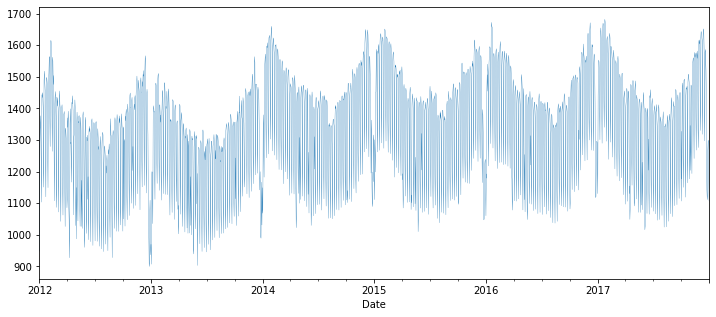

In [54]:
opsd_daily['Consumption'].loc['2012':'2017'].plot(linewidth=.3, figsize=(12,5))

In [ ]:
# buat coba2
# https://www.kaggle.com/datasnaek/youtube-new/data?select=USvideos.csv